In [17]:
#set up dependencies
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as st
from scipy.stats import linregress

In [18]:
#Get the file read into the notebook
nfl_file_path = Path("data_files/team_stats_2003_2023.csv")
nfl_data = pd.read_csv(nfl_file_path)

#create dictionary that contains the column indices
col_index_dict = dict(enumerate(nfl_data.columns))
col_index_dict

{0: 'year',
 1: 'team',
 2: 'wins',
 3: 'losses',
 4: 'win_loss_perc',
 5: 'points',
 6: 'points_opp',
 7: 'points_diff',
 8: 'mov',
 9: 'g',
 10: 'total_yards',
 11: 'plays_offense',
 12: 'yds_per_play_offense',
 13: 'turnovers',
 14: 'fumbles_lost',
 15: 'first_down',
 16: 'pass_cmp',
 17: 'pass_att',
 18: 'pass_yds',
 19: 'pass_td',
 20: 'pass_int',
 21: 'pass_net_yds_per_att',
 22: 'pass_fd',
 23: 'rush_att',
 24: 'rush_yds',
 25: 'rush_td',
 26: 'rush_yds_per_att',
 27: 'rush_fd',
 28: 'penalties',
 29: 'penalties_yds',
 30: 'pen_fd',
 31: 'score_pct',
 32: 'turnover_pct',
 33: 'exp_pts_tot',
 34: 'ties'}

In [19]:
#write for loop that changes the old team names to current form
for row, team in enumerate(nfl_data["team"]):
    if team == "Oakland Raiders":
        nfl_data.loc[row, "team"] = "Las Vegas Raiders" 
    elif team == "St. Louis Rams":
        nfl_data.loc[row, "team"] = "Los Angeles Rams"
    elif team == "Washington Redskins":    
        nfl_data.loc[row, "team"] = "Washington Commanders"
    elif team == "Washington Football Team":
        nfl_data.loc[row, "team"] = "Washington Commanders"
    elif team == "San Diego Chargers":
        nfl_data.loc[row, "team"] = "Los Angeles Chargers"


#create lists for each divisions to be used to create a dictionary of divisions
afc_east = ["New England Patriots",
            "Miami Dolphins",
             "Buffalo Bills",
              "New York Jets"]
afc_west = ["Kansas City Chiefs",
            "Las Vegas Raiders",
            "Denver Broncos",
            "Los Angeles Chargers"]
afc_north = ["Baltimore Ravens",
             "Cleveland Browns",
             "Pittsburgh Steelers",
             "Cincinnatti Bengals"]
afc_south = ["Houston Texans",
             "Jacksonville Jaguars",
             "Indianapolis Colts",
             "Tennessee Titans"]
nfc_east = ["Dallas Cowboys",
            "Philadelphia Eagles",
            "New York Giants",
            "Washington Commanders"]
nfc_west = ["San Francisco 49ers",
            "Los Angeles Rams",
            "Seattle Seahawks",
            "Arizona Cardinals"]
nfc_north = ["Detroit Lions",
             "Green Bay Packers",
             "Minnesota Vikings",
             "Chicago Bears"]
nfc_south = ["Tampa Bay Buccaneers",
             "New Orleans Saints",
             "Atlanta Falcons",
             "Carolina Panthers"]
#put these lists into a dictionary
divisions_dict = {"AFC East" : afc_east,
                  "AFC West" : afc_west,
                  "AFC North" : afc_north,
                  "AFC South" : afc_south,
                  "NFC East" : nfc_east,
                  "NFC West" : nfc_west,
                  "NFC North" : nfc_north,
                  "NFC South" : nfc_south}


In [20]:
#write function that maps the teams to their respective divisions
def map_division(team_name):
    for division, teams in divisions_dict.items():
        if team_name in teams:
            return division
    return None  # Handle teams not found in any division

# Apply the custom function to create a new column for divisions
nfl_data['division'] = nfl_data['team'].apply(map_division)


In [21]:
#isolate the columns of interest
col_list = ['team', 'wins', 'turnovers', 'fumbles_lost', 'pass_int']
#retrieve only those columns data
turnovers_df = nfl_data[col_list]
#Note: we didn't include the year column, but this dataframe has all years in the dataset
#group by team and sum all of these metrics to get their totals from 2003-2023
teams_df = turnovers_df.groupby('team').sum()
teams_df = teams_df.reset_index()
teams_df.head()

,team,wins,turnovers,fumbles_lost,pass_int
0,Arizona Cardinals,149,585,222,363
1,Atlanta Falcons,169,482,196,286
2,Baltimore Ravens,203,499,211,288
3,Buffalo Bills,166,549,226,323
4,Carolina Panthers,161,531,201,330


In [22]:
#run the previously defined function on the new dataframe
teams_df['division'] = teams_df['team'].apply(map_division)
teams_df.head()

,team,wins,turnovers,fumbles_lost,pass_int,division
0,Arizona Cardinals,149,585,222,363,NFC West
1,Atlanta Falcons,169,482,196,286,NFC South
2,Baltimore Ravens,203,499,211,288,AFC North
3,Buffalo Bills,166,549,226,323,AFC East
4,Carolina Panthers,161,531,201,330,NFC South


From 2003-2023:
the maximum number of WINS accumulated by any team from 2003-2023 is 241 by the New England Patriots
the maximum number of TURNOVERS accumulated by any team from 2003-2023 is 601 by the Cleveland Browns

The correlation between Wins & Turnovers from 2003-2023 in the NFL is -0.79.


The linear regression equation for the relationship between these two variables is 
y = -0.51x + 432.16 
where 'y' is the outcome variable (Wins) and 'x' is the predictor variable (turnovers)


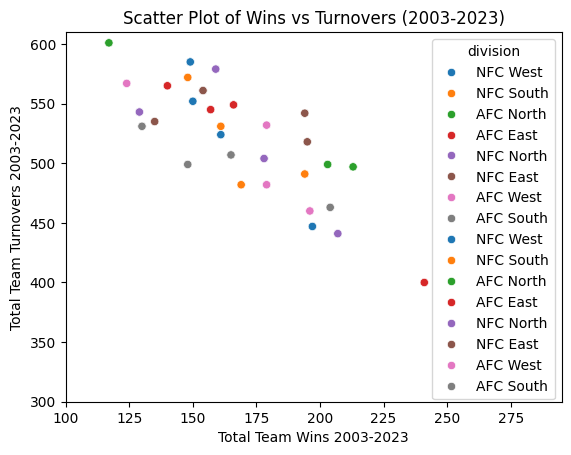

In [23]:
#get the maximum number of wins accumulated by a team
max_wins = teams_df['wins'].max()
#get the row index for where this occurs to identify the team name later
max_wins_index = teams_df['wins'].idxmax()
#get the maximum number of turnovers accumulated by a team
max_turnovers = teams_df['turnovers'].max()
#get the index where this occurs to identify the team name
max_turnovers_index = teams_df['turnovers'].idxmax()
print(f"From 2003-2023:\n"
      f"the maximum number of WINS accumulated by any team from 2003-2023 is {max_wins} "
      f"by the {teams_df.loc[max_wins_index, 'team']}")
print(f"the maximum number of TURNOVERS accumulated by any team from 2003-2023 is {max_turnovers} "
      f"by the {teams_df.loc[max_turnovers_index, 'team']}\n")

#define/identify the variables of interest
wins = teams_df['wins']
turnovers = teams_df['turnovers']
#run the correlation between the variables
correlation = st.pearsonr(wins,turnovers)
#print the output
print(f"The correlation between Wins & Turnovers from 2003-2023 in the NFL is {round(correlation[0],2)}.\n\n")
#plot the data on a scatter plot 
sns.scatterplot(x = 'wins', y = 'turnovers', hue='division', data = teams_df)
#label the axes
plt.xlabel('Total Team Turnovers 2003-2023')
plt.ylabel('Total Team Wins 2003-2023')

#calculate the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(turnovers, wins)
regress_values = turnovers * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print a statement that displays the mathematical relationship between the two variables
print("The linear regression equation for the relationship between these two variables is \n"
      f"{line_eq} \n"
      "where 'y' is the outcome variable (Wins) and 'x' is the predictor variable (turnovers)")
#plot the data on a scatter plot 
sns.scatterplot(x = 'wins', y = 'turnovers', hue='division', data = teams_df)
plt.plot(turnovers, regress_values,"r-")
plt.xlim(100, 295)  # Replace x_min and x_max with your desired values
plt.ylim(300, 610) 
#label the axes
plt.xlabel('Total Team Wins 2003-2023')
plt.ylabel('Total Team Turnovers 2003-2023')
plt.title('Scatter Plot of Wins vs Turnovers (2003-2023)')
plt.show()


In [24]:
nfc_east_df = nfl_data[nfl_data['division'] == 'NFC East']
nfc_east_cols = ['year', 'team', 'wins', 'turnovers', 'fumbles_lost', 'pass_int']

#retrieve the dame columns as before
nfc_east_df = nfc_east_df[nfc_east_cols]
nfc_east_df.head()

,year,team,wins,turnovers,fumbles_lost,pass_int
16,2003,Philadelphia Eagles,12,22,11,11
17,2003,Dallas Cowboys,10,29,8,21
18,2003,Washington Commanders,5,28,12,16
19,2003,New York Giants,4,38,18,20
48,2004,Philadelphia Eagles,13,22,11,11


In [25]:
nfc_east_grouped_df = nfc_east_df.groupby('team').sum()
nfc_east_grouped_df = nfc_east_grouped_df.reset_index()
nfc_east_grouped_df.head()

,team,year,wins,turnovers,fumbles_lost,pass_int
0,Dallas Cowboys,42273,195,518,203,315
1,New York Giants,42273,154,561,228,333
2,Philadelphia Eagles,42273,194,542,249,293
3,Washington Commanders,42273,135,535,228,307


From 2003-2023:
the maximum number of WINS accumulated by any NFC East team from 2003-2023 is 195 by the Dallas Cowboys
the maximum number of TURNOVERS accumulated by any NFC East team from 2003-2023 is 561 by the New York Giants

The correlation between Wins & Turnovers in the NFC EAST from 2003-2023 in the NFL is -0.38.

The linear regression equation for the relationship between these two variables is 
y = -0.16x + 12.15 
where 'y' is the outcome variable (Wins) and 'x' is the predictor variable (turnovers)


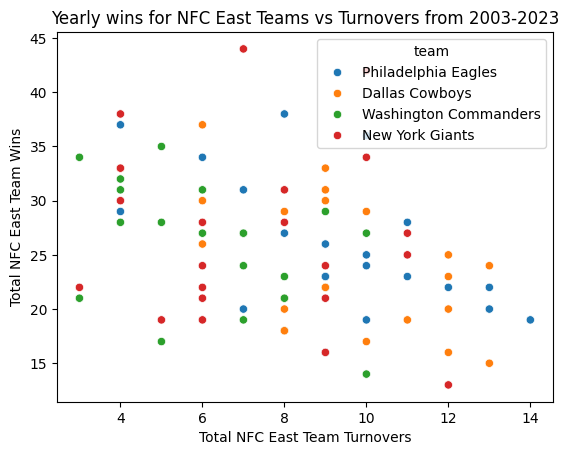

In [26]:
#GET MAX WINS AND TURNOVERS OVER THE ENTIRE TIME PERIOD (2003-2023)
#Wins:
max_nfc_east_wins = nfc_east_grouped_df['wins'].max()
max_nfc_east_wins_index = nfc_east_grouped_df['wins'].idxmax() #obtain index for reference
#Turnovers:
max_nfc_east_turnovers = nfc_east_grouped_df['turnovers'].max()
max_nfc_east_turnovers_index = nfc_east_grouped_df['turnovers'].idxmax()
#print the results
print(f"From 2003-2023:\n"
      f"the maximum number of WINS accumulated by any NFC East team from 2003-2023 is {max_nfc_east_wins} "
      f"by the {nfc_east_grouped_df.loc[max_nfc_east_wins_index, 'team']}")
print(f"the maximum number of TURNOVERS accumulated by any NFC East team from 2003-2023 is {max_nfc_east_turnovers} "
      f"by the {nfc_east_grouped_df.loc[max_nfc_east_turnovers_index, 'team']}\n")


#CORRELATION:

#define variables & run correlation
nfc_east_wins = nfc_east_df['wins']
nfc_east_turnovers = nfc_east_df['turnovers']
nfc_east_correlation = st.pearsonr(nfc_east_wins, nfc_east_turnovers)
#print results
print(f"The correlation between Wins & Turnovers in the NFC EAST from 2003-2023 in the NFL is {round(nfc_east_correlation[0],2)}.\n")



#calculate the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(nfc_east_turnovers, nfc_east_wins)
regress_values = turnovers * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print a statement that displays the mathematical relationship between the two variables
print("The linear regression equation for the relationship between these two variables is \n"
      f"{line_eq} \n"
      "where 'y' is the outcome variable (Wins) and 'x' is the predictor variable (turnovers)")


#PLOTTING:
 
sns.scatterplot(x = 'wins', y = 'turnovers', hue='team', legend = 'full', data = nfc_east_df)
#label the axes & title 
plt.xlabel('Total NFC East Team Turnovers')
plt.ylabel('Total NFC East Team Wins')
plt.title('Yearly wins for NFC East Teams vs Turnovers from 2003-2023')
#set limits for axes from values found earlier

plt.show()


In [13]:
#isolate Washington Commanders data from data frame
nyg_cols = ['year', 'wins', 'turnovers', 'fumbles_lost', 'pass_int']
nyg_data = nfl_data[nfl_data['team'] == 'New York Giants']
nyg_df = nyg_data[nyg_cols]
#clean the data
nyg_df = nyg_df.reset_index()
nyg_df = nyg_df.drop('index', axis = 1)
nyg_df.head()

,year,wins,turnovers,fumbles_lost,pass_int
0,2003,4,38,18,20
1,2004,6,24,11,13
2,2005,11,25,8,17
3,2006,8,28,10,18
4,2007,10,34,14,20


From 2003-2023:
the maximum number of WINS accumulated by the New York Giants from 2003-2023 is 12 in 2008
the maximum number of TURNOVERS accumulated by the New York Giants from 2003-2023 is 44 in 2013

The correlation between Wins & Turnovers in the Washington Commanders over this period is -0.11.

The linear regression equation for the relationship between these two variables for the New York Giants is:
 
y = -0.04x + 8.29 

where 'y' is the outcome variable (Wins) and 'x' is the predictor variable (turnovers)


(0.0, 50.0)

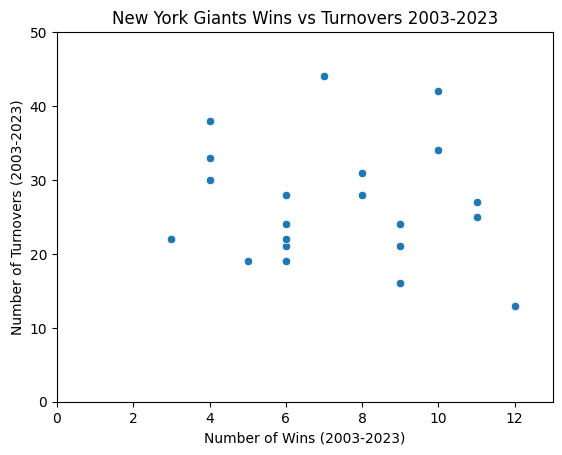

In [27]:
#GET MAX WINS AND TURNOVERS OVER THE ENTIRE TIME PERIOD (2003-2023)
#Wins:
nyg_wins = nyg_df['wins'].max()
nyg_wins_index = nyg_df['wins'].idxmax() #obtain index for reference
#Turnovers:
nyg_turnovers = nyg_df['turnovers'].max()
nyg_turnovers_index = nyg_df['turnovers'].idxmax()
#print the results
print(f"From 2003-2023:\n"
      f"the maximum number of WINS accumulated by the New York Giants from 2003-2023 is {nyg_wins} "
      f"in {nyg_df.loc[nyg_wins_index, 'year']}")
print(f"the maximum number of TURNOVERS accumulated by the New York Giants from 2003-2023 is {nyg_turnovers} "
      f"in {nyg_df.loc[nyg_turnovers_index, 'year']}\n")

#CORRELATION:

#define variables & run correlation
nyg_wins = nyg_df['wins']
nyg_turnovers = nyg_df['turnovers']
nyg_correlation = st.pearsonr(nyg_wins, nyg_turnovers)
#print results
print(f"The correlation between Wins & Turnovers in the Washington Commanders over this period is {round(nyg_correlation[0],2)}.\n")


#calculate the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(nyg_turnovers, nyg_wins)
regress_values = turnovers * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print a statement that displays the mathematical relationship between the two variables
print("The linear regression equation for the relationship between these two variables for the New York Giants is:\n \n"
      f"{line_eq} \n\n"
      "where 'y' is the outcome variable (Wins) and 'x' is the predictor variable (turnovers)")

#PLOTTING:


sns.scatterplot(x = 'wins', y = 'turnovers', legend = 'full', data = nyg_df)
plt.xlabel('Number of Wins (2003-2023)')
plt.ylabel('Number of Turnovers (2003-2023)')
plt.title('New York Giants Wins vs Turnovers 2003-2023')
plt.xlim(0,13)
plt.ylim(0, 50)